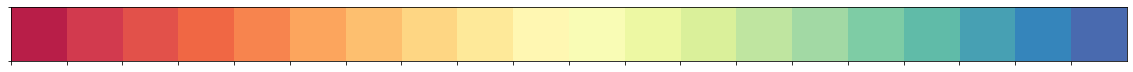

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
# proteins_all = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_proteins_archaea_all.tsv',
#            sep='\t').merge(pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_product_proteins_archaea_all.tsv',
#            sep='\t'))
# proteins_all = proteins_all[proteins_all['locus_tag']!='locus_tag']

# proteins_all.sort_values('COG')

proteins_gut = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_proteins_archaea_gut.tsv',
           sep='\t').merge(pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_product_proteins_archaea_gut.tsv',
           sep='\t'))
proteins_gut = proteins_gut[proteins_gut['locus_tag']!='locus_tag']


proteins_not_gut = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_proteins_archaea_not_gut.tsv',
           sep='\t').merge(pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/prokka/tmp_product_proteins_archaea_not_gut.tsv',
           sep='\t'))
proteins_not_gut = proteins_not_gut[proteins_not_gut['locus_tag']!='locus_tag']

In [3]:
proteins_not_gut.shape, proteins_gut.shape

((1792, 5), (4811, 5))

In [4]:
tmp_not_gut = proteins_not_gut.groupby(['COG', 'product'], as_index=False).agg({'locus_tag':'count'})

In [5]:
tmp_gut = proteins_gut.groupby(['COG', 'product'], as_index=False).agg({'locus_tag':'count'})

In [6]:
gut_unique_groups = tmp_gut[~tmp_gut['COG'].isin(tmp_not_gut['COG'])].sort_values('locus_tag', ascending=False)
gut_unique_groups

COG                                            product  locus_tag
335  COG1120          Cobalamin import ATP-binding protein BtuD         17
553  COG2217            putative copper-exporting P-type ATPase          9
258  COG0609      Cobalamin import system permease protein BtuC          7
269  COG0655                           Iron-sulfur flavoprotein          7
267  COG0644      Digeranylgeranylglycerophospholipid reductase          6
..       ...                                                ...        ...
498  COG1941            Coenzyme F420 hydrogenase subunit gamma          1
216  COG0513                putative ATP-dependent RNA helicase          1
495  COG1927  F420-dependent methylenetetrahydromethanopteri...          1
222  COG0520                               Cysteine desulfurase          1
370  COG1343            CRISPR-associated endoribonuclease Cas2          1

[356 rows x 3 columns]

In [20]:
gut_unique_groups[['COG']].head(10).merge(proteins_gut, on='COG').tail(50)

COG       locus_tag     gene  EC_number  \
22  COG2217  FCEHONPE_01242   copA_4    7.2.2.8   
23  COG2217  NELBPHDD_00355   copA_1    7.2.2.8   
24  COG2217  NELBPHDD_00356   copA_2    7.2.2.8   
25  COG2217  NELBPHDD_00739   copA_3    7.2.2.8   
26  COG0609  MENPBGDH_00133   btuC_1        NaN   
27  COG0609  MENPBGDH_00324   btuC_2        NaN   
28  COG0609  MENPBGDH_00553   btuC_5        NaN   
29  COG0609  MENPBGDH_00643   btuC_6        NaN   
30  COG0609  MENPBGDH_00670  btuC_11        NaN   
31  COG0609  MENPBGDH_01262  btuC_20        NaN   
32  COG0609  NELBPHDD_01185     btuC        NaN   
33  COG0655  MENPBGDH_00130      NaN        NaN   
34  COG0655  MENPBGDH_00627      NaN        NaN   
35  COG0655  MENPBGDH_01039      NaN        NaN   
36  COG0655  MENPBGDH_01052      NaN        NaN   
37  COG0655  FCEHONPE_00321      NaN        NaN   
38  COG0655  FCEHONPE_00623      NaN        NaN   
39  COG0655  NELBPHDD_01014      NaN        NaN   
40  COG0644  MENPBGDH_00206      NaN   1.3.7.11   
41  COG0644  MENPBGDH_01219      NaN   1.3.7.11   
42  COG0644  MENPBGDH_01276      NaN  1.3.1.101   
43  COG0644  MENPBGDH_01649      NaN   1.3.7.11   
44  COG0644  MENPBGDH_01719      NaN   1.3.7.11   
45  COG0644  FCEHONPE_00259      NaN   1.3.7.11   
46  COG0007  MENPBGDH_00171      NaN  2.1.1.107   
47  COG0007  MENPBGDH_00172      NaN  2.1.1.107   
48  COG0007  MENPBGDH_00173      NaN  2.1.1.107   
49  COG0007  MENPBGDH_01671      NaN  2.1.1.107   
50  COG0007  FCEHONPE_00147      NaN  2.1.1.107   
51  COG0007  NELBPHDD_00602      NaN  2.1.1.107   
52  COG0426  MENPBGDH_00889     fprA    1.-.-.-   
53  COG0426  FCEHONPE_00389     fprA    1.-.-.-   
54  COG0426  FCEHONPE_01041     fpaA    1.-.-.-   
55  COG0426  NELBPHDD_00868   fprA_1    1.-.-.-   
56  COG0426  NELBPHDD_01023   fprA_2    1.-.-.-   
57  COG0037  MENPBGDH_00780     ttuA    2.8.1.-   
58  COG0037  FCEHONPE_00508   ttuA_1    2.8.1.-   
59  COG0037  FCEHONPE_01438   ttuA_2    2.8.1.-   
60  COG0037  NELBPHDD_00514   ttuA_1    2.8.1.-   
61  COG0037  NELBPHDD_00538   ttuA_2    2.8.1.-   
62  COG3261  MENPBGDH_00103   mbhL_1   1.12.7.2   
63  COG3261  MENPBGDH_01644   mbhL_2   1.12.7.2   
64  COG3261  FCEHONPE_00033   mbhL_1   1.12.7.2   
65  COG3261  FCEHONPE_00863   mbhL_2   1.12.7.2   
66  COG3261  NELBPHDD_00680     mbhL   1.12.7.2   
67  COG1773  MENPBGDH_00840      rub        NaN   
68  COG1773  FCEHONPE_01292    rub_1        NaN   
69  COG1773  FCEHONPE_01293    rub_2        NaN   
70  COG1773  NELBPHDD_00025    rub_1        NaN   
71  COG1773  NELBPHDD_00026    rub_2        NaN   

                                              product  
22            putative copper-exporting P-type ATPase  
23            putative copper-exporting P-type ATPase  
24            putative copper-exporting P-type ATPase  
25            putative copper-exporting P-type ATPase  
26      Cobalamin import system permease protein BtuC  
27      Cobalamin import system permease protein BtuC  
28      Cobalamin import system permease protein BtuC  
29      Cobalamin import system permease protein BtuC  
30      Cobalamin import system permease protein BtuC  
31      Cobalamin import system permease protein BtuC  
32      Cobalamin import system permease protein BtuC  
33                           Iron-sulfur flavoprotein  
34                           Iron-sulfur flavoprotein  
35                           Iron-sulfur flavoprotein  
36                           Iron-sulfur flavoprotein  
37                           Iron-sulfur flavoprotein  
38                           Iron-sulfur flavoprotein  
39                           Iron-sulfur flavoprotein  
40      Digeranylgeranylglycerophospholipid reductase  
41      Digeranylgeranylglycerophospholipid reductase  
42      Digeranylgeranylglycerophospholipid reductase  
43      Digeranylgeranylglycerophospholipid reductase  
44      Digeranylgeranylglycerophospholipid reductase  
45      Digeranylgeranylglycerophospholipid reductase  
46  S-

In [18]:
gut_unique_groups.head(10)

COG                                            product  locus_tag
335  COG1120          Cobalamin import ATP-binding protein BtuD         17
553  COG2217            putative copper-exporting P-type ATPase          9
258  COG0609      Cobalamin import system permease protein BtuC          7
269  COG0655                           Iron-sulfur flavoprotein          7
267  COG0644      Digeranylgeranylglycerophospholipid reductase          6
7    COG0007  S-adenosyl-L-methionine-dependent uroporphyrin...          6
173  COG0426                           Type A flavoprotein FprA          5
25   COG0037       tRNA-5-methyluridine(54) 2-sulfurtransferase          5
573  COG3261           Membrane-bound hydrogenase subunit alpha          5
462  COG1773                                         Rubredoxin          5

In [ ]:
df2plot = gut_unique_groups.head(10)


fig, ax = plt.subplots()

fig.set_size_inches(40, 20)

rects1 = ax.barh(df2plot['COG'], df2plot['locus_tag'], align='center')

ax.set_title('Unique most abundant archaea \n protein families from gut', fontsize=45)

ax.set_yticklabels(df2plot['product'], rotation=0)
ax.set_xlabel("number of proteins",fontsize=45)
ax.invert_yaxis() 

ax.tick_params(axis='both', which='major', labelsize=45)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

products = df2plot['product']
y_pos = np.arange(len(products))
# performance = 3 + 10 * np.random.rand(len(products))
# error = np.random.rand(len(products))

ax.barh(y_pos, df2plot['locus_tag'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(products, fontsize=24)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("number of proteins",fontsize=24)
ax.set_title('Unique most abundant archaea \n protein families from gut', fontsize=24)



# plt.show()